In [1]:
!wget https://www.dropbox.com/s/1og5ch4zy6fmpwv/sl_signs.zip

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [5]:
!unzip sl_signs.zip

Archive:  sl_signs.zip
   creating: sl_signs/
   creating: sl_signs/test/
   creating: sl_signs/test/sl_100/
  inflating: sl_signs/test/sl_100/0001_sl_100.jpg  
  inflating: sl_signs/test/sl_100/0004_sl_100.jpg  
  inflating: sl_signs/test/sl_100/0012_sl_100.jpg  
  inflating: sl_signs/test/sl_100/0022_sl_100.jpg  
  inflating: sl_signs/test/sl_100/0026_sl_100.jpg  
  inflating: sl_signs/test/sl_100/0030_sl_100.jpg  
  inflating: sl_signs/test/sl_100/0035_sl_100.jpg  
  inflating: sl_signs/test/sl_100/0041_sl_100.jpg  
  inflating: sl_signs/test/sl_100/0046_sl_100.jpg  
  inflating: sl_signs/test/sl_100/0059_sl_100.jpg  
  inflating: sl_signs/test/sl_100/0068_sl_100.jpg  
  inflating: sl_signs/test/sl_100/0070_sl_100.jpg  
  inflating: sl_signs/test/sl_100/0086_sl_100.jpg  
  inflating: sl_signs/test/sl_100/0090_sl_100.jpg  
  inflating: sl_signs/test/sl_100/0095_sl_100.jpg  
  inflating: sl_signs/test/sl_100/0103_sl_100.jpg  
  inflating: sl_signs/test/sl_100/0104_sl_100.jpg  
  infla

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [5]:
img_height, img_width = 32, 32

batch_size = 20

train_ds = tf.keras.utils.image_dataset_from_directory(
    "sl_signs/train",
    image_size = (img_height, img_width),
    batch_size = batch_size
)
val_ds = tf.keras.utils.image_dataset_from_directory(
    "sl_signs/validation",
    image_size = (img_height, img_width),
    batch_size = batch_size
)
test_ds = tf.keras.utils.image_dataset_from_directory(
    "sl_signs/test",
    image_size = (img_height, img_width),
    batch_size = batch_size
)

Found 1691 files belonging to 8 classes.
Found 254 files belonging to 8 classes.
Found 472 files belonging to 8 classes.


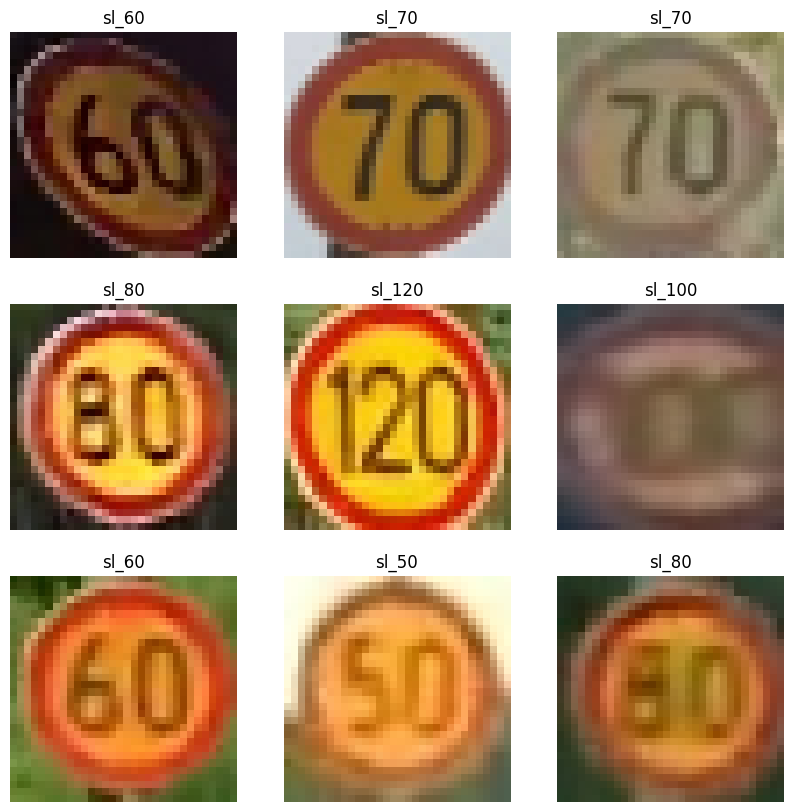

In [17]:
class_names = ["sl_30", "sl_40", "sl_50", "sl_60", "sl_70", "sl_80", "sl_100", "sl_120"]
plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3,3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [18]:
model = tf.keras.Sequential(
    [
      tf.keras.layers.Rescaling(1./255),
      tf.keras.layers.Conv2D(32, 3, activation="relu"),
      tf.keras.layers.MaxPooling2D(),
      tf.keras.layers.Conv2D(32, 3, activation="relu"),
      tf.keras.layers.MaxPooling2D(),
      tf.keras.layers.Conv2D(32, 3, activation="relu"),
      tf.keras.layers.MaxPooling2D(),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(128, activation="relu"),
      tf.keras.layers.Dense(8)
    ]
)

In [19]:
model.compile(
    optimizer="adam",
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics=['accuracy']
)

In [20]:
model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = 50
)

Epoch 1/50
85/85 [==============================] - 2s 18ms/step - loss: 1.8463 - accuracy: 0.2910 - val_loss: 1.8121 - val_accuracy: 0.2559
Epoch 2/50
85/85 [==============================] - 1s 11ms/step - loss: 1.6550 - accuracy: 0.3702 - val_loss: 1.3887 - val_accuracy: 0.5433
Epoch 3/50
85/85 [==============================] - 1s 11ms/step - loss: 0.8026 - accuracy: 0.7575 - val_loss: 0.4638 - val_accuracy: 0.8740
Epoch 4/50
85/85 [==============================] - 1s 11ms/step - loss: 0.3119 - accuracy: 0.9160 - val_loss: 0.2662 - val_accuracy: 0.8976
Epoch 5/50
85/85 [==============================] - 1s 11ms/step - loss: 0.1620 - accuracy: 0.9580 - val_loss: 0.2016 - val_accuracy: 0.9291
Epoch 6/50
85/85 [==============================] - 1s 12ms/step - loss: 0.1045 - accuracy: 0.9740 - val_loss: 0.2190 - val_accuracy: 0.9409
Epoch 7/50
85/85 [==============================] - 1s 11ms/step - loss: 0.0824 - accuracy: 0.9758 - val_loss: 0.1025 - val_accuracy: 0.9685
Epoch 8/50
85

In [23]:
model.evaluate(test_ds)

24/24 [==============================] - 0s 5ms/step - loss: 0.0581 - accuracy: 0.9936


[0.05806928873062134, 0.9936440587043762]

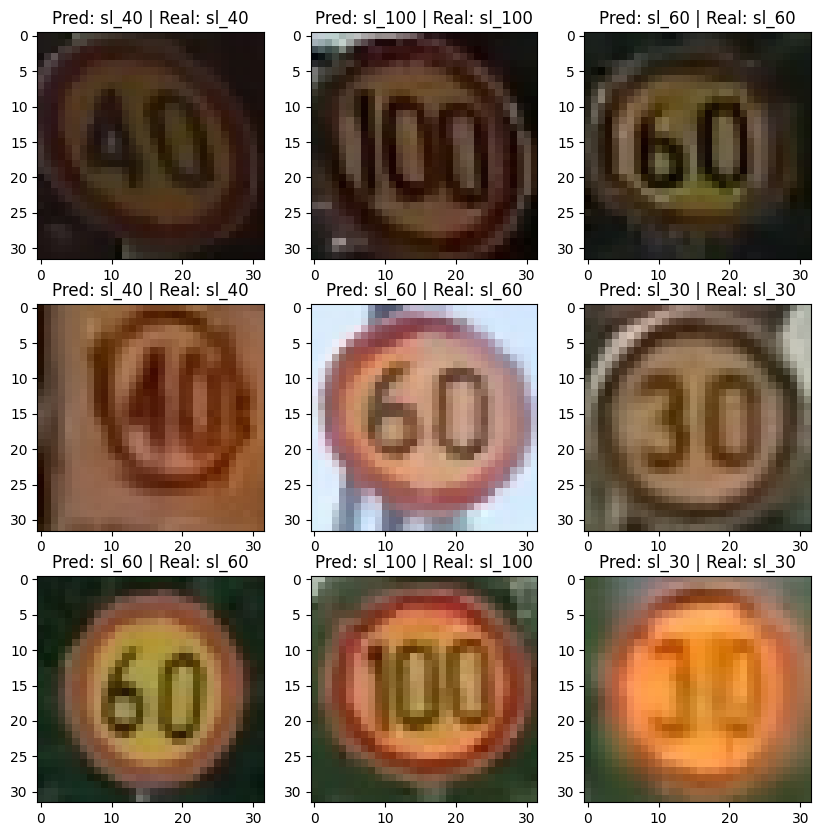

In [29]:
import numpy

plt.figure(figsize=(10,10))
for images, labels in test_ds.take(1):
  classifications = model(images)
  
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    index = numpy.argmax(classifications[i])
    plt.title("Pred: " + class_names[index] + " | Real: " + class_names[labels[i]])

In [26]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open("icmodel.tflite", 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\Seppo\AppData\Local\Temp\tmp4vidc3hh\assets


INFO:tensorflow:Assets written to: C:\Users\Seppo\AppData\Local\Temp\tmp4vidc3hh\assets
